In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [35]:
# import data into environment
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
#checking if data contains any null values
for i in df.columns:
  print("{} has {} null values".format(i,df[i].isna().sum()))

age has 0 null values
sex has 0 null values
bmi has 0 null values
children has 0 null values
smoker has 0 null values
region has 0 null values
charges has 0 null values


In [37]:
#check in a feature is categorical and how many unique category it has
for i in df.columns:
  if df[i].dtype=='O':
    print("{} has {} unique values".format(i, len(df[i].unique())))

sex has 2 unique values
smoker has 2 unique values
region has 4 unique values


In [38]:
categorical_Values = [feature for feature in df.columns if df[feature].dtype=='O']
categorical_Values

['sex', 'smoker', 'region']

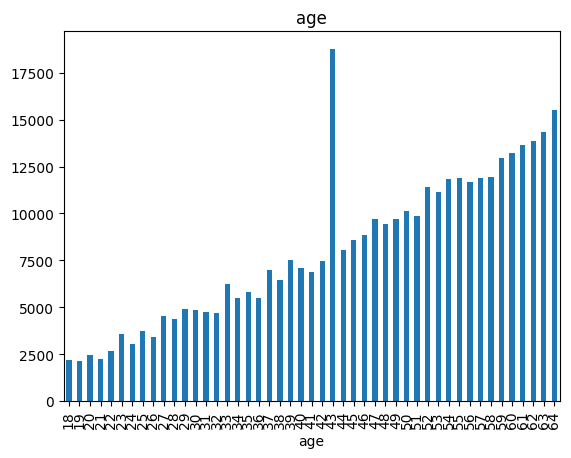

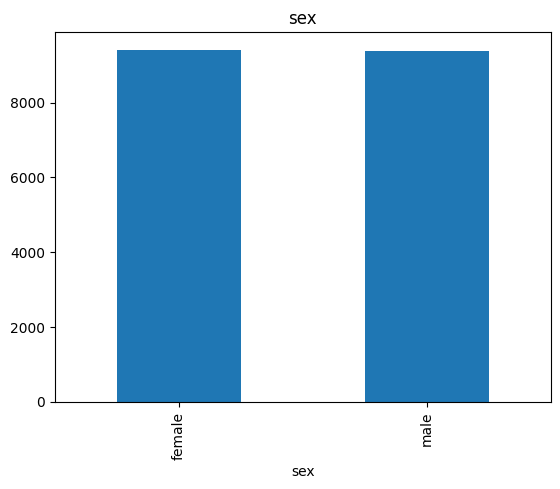

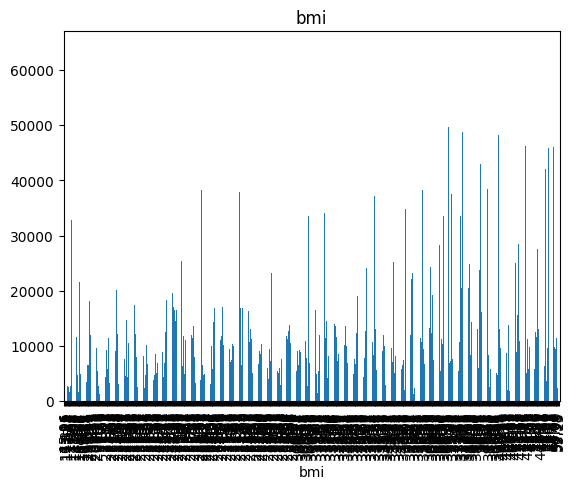

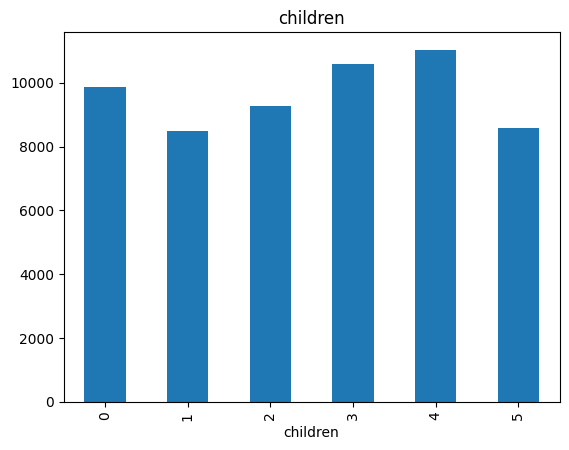

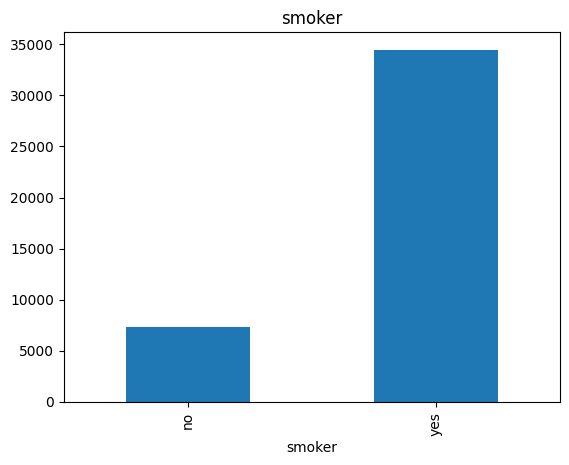

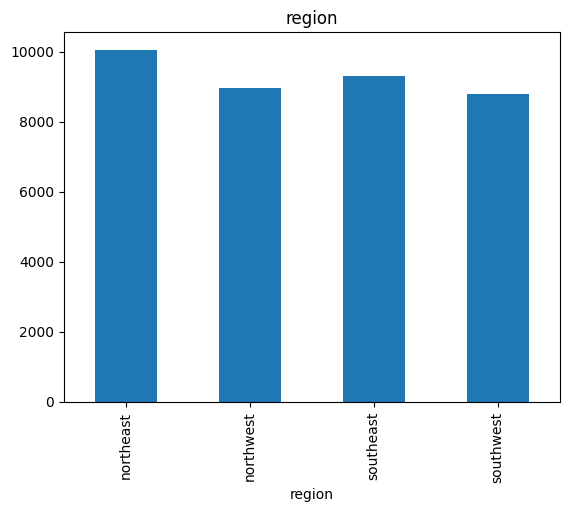

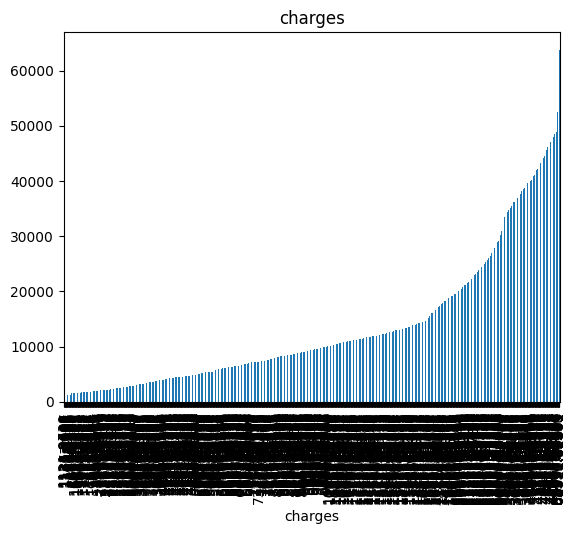

In [39]:
for feature in df.columns:
  data = df.copy()

  data.groupby(feature)['charges'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [40]:
#converting categorical features to discrete labels
for feature in categorical_Values:
    labels_ordered=df.groupby([feature])['charges'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [42]:
#Splitting our data into featurea and labels
X = df.drop('charges',axis=1)
y = df['charges']
X,y

(      age  sex     bmi  children  smoker  region
 0      19    0  27.900         0       1       0
 1      18    1  33.770         1       0       3
 2      28    1  33.000         3       0       3
 3      33    1  22.705         0       0       1
 4      32    1  28.880         0       0       1
 ...   ...  ...     ...       ...     ...     ...
 1333   50    1  30.970         3       0       1
 1334   18    0  31.920         0       0       2
 1335   18    0  36.850         0       0       3
 1336   21    0  25.800         0       0       0
 1337   61    0  29.070         0       1       1
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [43]:
#doing train test split for training ans testing data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [44]:
len(X_train),len(X_test),len(y_train),len(y_test)

(1003, 335, 1003, 335)

In [45]:
X_train.shape

(1003, 6)

In [46]:
#set random seed
tf.random.set_seed(42)

#create a model
insuranceCost = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model
insuranceCost.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                      metrics=['mae'])

#fit the model
insuranceCost.fit(X_train,y_train,epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 8010.0845 - mae: 8010.0845
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 6480.3257 - mae: 6480.3257
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 5912.0928 - mae: 5912.0928
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 4666.0723 - mae: 4666.0723
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 4349.4697 - mae: 4349.4697
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 4342.4224 - mae: 4342.4224
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 4811.8022 - mae: 4811.8022
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 4444.5146 - mae: 4444.5146
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 3885.7471 - mae: 3885.7471
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 4003.6685 - mae: 4003.6685

In [47]:
y_train.mean(),y_train.median()

(13267.935817337988, 9447.3824)

In [48]:
pd.Series(insuranceCost.predict(X_test).flatten()).median()

11/11 [==============================] - 0s 2ms/step


8527.29

# Let's preprocess our data a bit more and normalize it

In [49]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [50]:
#let's normalize the continuous values of dataset
feature_scale = [feature for feature in df.columns if feature not in ['charges']]

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(df[feature_scale])

MinMaxScaler()

In [51]:
scalar.transform(df[feature_scale])

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        1.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        1.        ],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        0.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [52]:
df = pd.concat([df[['charges']].reset_index(drop=True),
                    pd.DataFrame(scalar.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [53]:
df

,charges,age,sex,bmi,children,smoker,region
0,16884.92400,0.021739,0.0,0.321227,0.0,1.0,0.000000
1,1725.55230,0.000000,1.0,0.479150,0.2,0.0,1.000000
2,4449.46200,0.217391,1.0,0.458434,0.6,0.0,1.000000
3,21984.47061,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,3866.85520,0.304348,1.0,0.347592,0.0,0.0,0.333333
...,...,...,...,...,...,...,...
1333,10600.54830,0.695652,1.0,0.403820,0.6,0.0,0.333333
1334,2205.98080,0.000000,0.0,0.429379,0.0,0.0,0.666667
1335,1629.83350,0.000000,0.0,0.562012,0.0,0.0,1.000000
1336,2007.94500,0.065217,0.0,0.264730,0.0,0.0,0.000000


In [54]:
#dependent ans independent variables
X = df.drop('charges',axis=1)
y = df['charges']

In [55]:
#doing train test split for training ans testing data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [56]:
insuranceCost.fit(X_train,y_train,epochs=150)

Epoch 1/150
32/32 [==============================] - 0s 2ms/step - loss: 5866.1382 - mae: 5866.1382
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 4117.3882 - mae: 4117.3882
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 3815.2761 - mae: 3815.2761
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 3482.8162 - mae: 3482.8162
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 3313.2969 - mae: 3313.2969
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 3338.3374 - mae: 3338.3374
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 3487.3369 - mae: 3487.3369
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 3481.9268 - mae: 3481.9268
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 3499.9568 - mae: 3499.9568
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 3372.5403 - mae: 3372.5403

In [57]:
insuranceCost.predict(X_test).mean()

11/11 [==============================] - 0s 2ms/step


11970.142

In [58]:
predictedCost = insuranceCost.predict(X_test)
pd.Series(predictedCost.flatten()).median()

11/11 [==============================] - 0s 2ms/step


8305.43

In [59]:
#let's build another one model with increased complexity

#set seed
tf.random.set_seed(42)

#create model
insuranceModel = tf.keras.Sequential([
    tf.keras.Input(shape=(6,)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model
insuranceModel.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=['mae'])

#fit the model
trainHistory = insuranceModel.fit(X_train,y_train,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 11616.0117 - mae: 11616.0117
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 6819.5190 - mae: 6819.5190
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 4357.0923 - mae: 4357.0923
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 3616.6160 - mae: 3616.6160
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 3498.3550 - mae: 3498.3550
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 3453.4878 - mae: 3453.4878
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 3432.3879 - mae: 3432.3879
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 3433.4277 - mae: 3433.4277
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 3387.2385 - mae: 3387.2385
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 3480.9722 - mae: 3480.97

In [60]:
predictedCost1 = insuranceModel.predict(X_test)
pd.Series(predictedCost1.flatten()).median()

11/11 [==============================] - 0s 2ms/step


8381.375

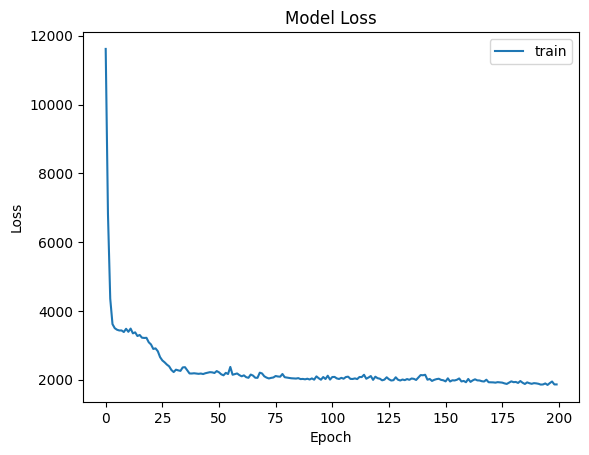

In [63]:
loss = trainHistory.history['loss']

plt.plot(loss, label='train')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()